## Importing Modules

In [1]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import nltk

## Extracting Data (BITCOIN)

In [2]:
nltk.download('vader_lexicon')
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['BTCS',]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

## Parsing Data

In [4]:
parsed_data = []

for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):

        title = row.a.text
        date_data = row.td.text.split(' ')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])

## Organizing Dataframe

In [5]:
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
df1 = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
print(df)

   ticker       date       time  \
0    BTCS  May-20-22  08:31AM     
1    BTCS  May-17-22  08:31AM     
2    BTCS  May-16-22  03:11PM     
3    BTCS  May-16-22  08:31AM     
4    BTCS  May-11-22  08:31AM     
5    BTCS  Apr-27-22  08:31AM     
6    BTCS  Apr-20-22  08:31AM     
7    BTCS  Mar-16-22  09:01AM     
8    BTCS  Mar-14-22  09:01AM     
9    BTCS  Mar-09-22  08:31AM     
10   BTCS  Mar-02-22  08:31AM     
11   BTCS  Mar-01-22  09:00AM     
12   BTCS  Feb-22-22  08:31AM     
13   BTCS  Feb-16-22  09:00AM     
14   BTCS  Feb-14-22  09:00AM     
15   BTCS  Jan-24-22  08:00AM     
16   BTCS  Jan-21-22  07:32AM     
17   BTCS  Jan-13-22  12:09PM     
18   BTCS  Jan-13-22  09:37AM     
19   BTCS  Jan-13-22  08:31AM     
20   BTCS  Jan-13-22  07:35AM     
21   BTCS  Jan-11-22  04:36PM     
22   BTCS  Jan-07-22  01:20PM     
23   BTCS  Jan-06-22  02:43PM     
24   BTCS  Jan-05-22  05:26PM     
25   BTCS  Jan-05-22  10:25AM     
26   BTCS  Jan-05-22  08:47AM     
27   BTCS  Jan-05-22

## Sentiment Analysis

In [6]:
vader = SentimentIntensityAnalyzer()
print (df['title'])
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
f2 = lambda title: vader.polarity_scores(title)['pos']
df['pos'] = df['title'].apply(f2)
f3 = lambda title: vader.polarity_scores(title)['neg']
df['neg'] = df['title'].apply(f2)
f4 = lambda title: vader.polarity_scores(title)['neu']
df['neu'] = df['title'].apply(f2)

0     BTCS to Present at H. C. Wainwright Global Inv...
1     BTCS Inc. and Force Family Office to Host Cryp...
2     BTCS Shares Gain on Q1 Revenue Growth; Becomes...
3                          BTCS Reports Q1 2022 Results
4     BTCS Adds Axie Infinity to its Blockchain Infr...
5     BTCS Adds Kava to its Blockchain Infrastructur...
6     BTCS Adds Polygon to its Blockchain Infrastruc...
7     BTCS to Present at Ladenburg Thalmann Virtual ...
8                          BTCS Reports Q4 2021 Results
9     BTCS Adds Terra to its Growing Blockchain Infr...
10    BTCS Set to Offer a Dividend Payable in Bitcoi...
11    BTCS Adds Polkadot to its Growing Blockchain I...
12    BTCS Prepares for Accelerated Growth with Appo...
13       Solana Added to BTCS Blockchain Infrastructure
14    BTCS to Present at Aegis Virtual Conference on...
15    BTCS Adds Kusama to its Blockchain Infrastruct...
16    Todays Biggest Pre-Market Stock Movers: 10 Top...
17    BTCS Stock Alert: Why Is the Bividend Issu

In [7]:
print(df)

   ticker       date       time  \
0    BTCS  May-20-22  08:31AM     
1    BTCS  May-17-22  08:31AM     
2    BTCS  May-16-22  03:11PM     
3    BTCS  May-16-22  08:31AM     
4    BTCS  May-11-22  08:31AM     
5    BTCS  Apr-27-22  08:31AM     
6    BTCS  Apr-20-22  08:31AM     
7    BTCS  Mar-16-22  09:01AM     
8    BTCS  Mar-14-22  09:01AM     
9    BTCS  Mar-09-22  08:31AM     
10   BTCS  Mar-02-22  08:31AM     
11   BTCS  Mar-01-22  09:00AM     
12   BTCS  Feb-22-22  08:31AM     
13   BTCS  Feb-16-22  09:00AM     
14   BTCS  Feb-14-22  09:00AM     
15   BTCS  Jan-24-22  08:00AM     
16   BTCS  Jan-21-22  07:32AM     
17   BTCS  Jan-13-22  12:09PM     
18   BTCS  Jan-13-22  09:37AM     
19   BTCS  Jan-13-22  08:31AM     
20   BTCS  Jan-13-22  07:35AM     
21   BTCS  Jan-11-22  04:36PM     
22   BTCS  Jan-07-22  01:20PM     
23   BTCS  Jan-06-22  02:43PM     
24   BTCS  Jan-05-22  05:26PM     
25   BTCS  Jan-05-22  10:25AM     
26   BTCS  Jan-05-22  08:47AM     
27   BTCS  Jan-05-22

In [8]:
f = lambda title: vader.polarity_scores(title)['compound']

df['compund'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date

f1 = lambda title: vader.polarity_scores(title)['neu']
df1['neu'] = df1['title'].apply(f1)
df1['date'] = pd.to_datetime(df.date).dt.date

<Figure size 1440x720 with 0 Axes>

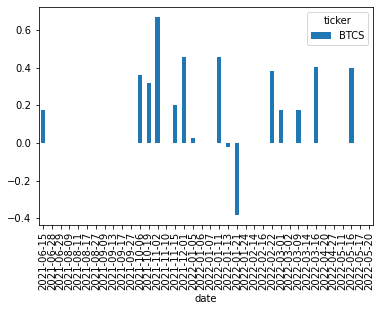

In [9]:
plt.figure(figsize=(20,10))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns").transpose()
mean_df.plot(kind='bar')
plt.show()

<Figure size 1440x720 with 0 Axes>

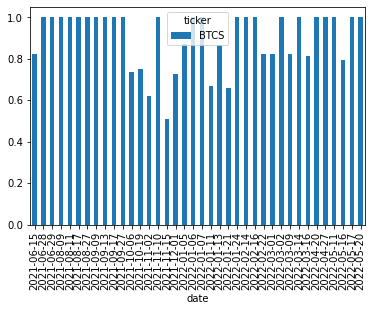

In [10]:
plt.figure(figsize=(20,10))
mean_df1 = df1.groupby(['ticker', 'date']).mean().unstack()
mean_df1 = mean_df1.xs('neu', axis="columns").transpose()
mean_df1.plot(kind='bar')
plt.show()

<Figure size 1440x720 with 0 Axes>

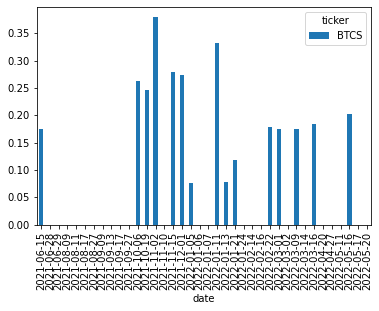

In [11]:
plt.figure(figsize=(20,10))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('neg', axis="columns").transpose()
mean_df.plot(kind='bar')
plt.show()

<Figure size 1440x720 with 0 Axes>

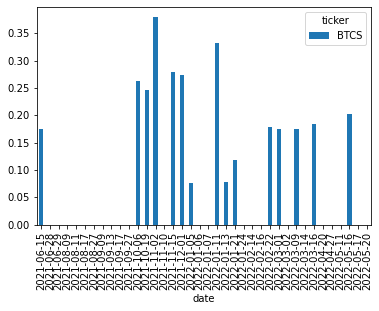

In [12]:
plt.figure(figsize=(20,10))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('pos', axis="columns").transpose()
mean_df.plot(kind='bar')
plt.show()

In [13]:
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
f2 = lambda title: vader.polarity_scores(title)['pos']
df['pos'] = df['title'].apply(f2)
f3 = lambda title: vader.polarity_scores(title)['neg']
df['neg'] = df['title'].apply(f2)
f4 = lambda title: vader.polarity_scores(title)['neu']
df['neu'] = df['title'].apply(f2)
print(df)

   ticker        date       time  \
0    BTCS  2022-05-20  08:31AM     
1    BTCS  2022-05-17  08:31AM     
2    BTCS  2022-05-16  03:11PM     
3    BTCS  2022-05-16  08:31AM     
4    BTCS  2022-05-11  08:31AM     
5    BTCS  2022-04-27  08:31AM     
6    BTCS  2022-04-20  08:31AM     
7    BTCS  2022-03-16  09:01AM     
8    BTCS  2022-03-14  09:01AM     
9    BTCS  2022-03-09  08:31AM     
10   BTCS  2022-03-02  08:31AM     
11   BTCS  2022-03-01  09:00AM     
12   BTCS  2022-02-22  08:31AM     
13   BTCS  2022-02-16  09:00AM     
14   BTCS  2022-02-14  09:00AM     
15   BTCS  2022-01-24  08:00AM     
16   BTCS  2022-01-21  07:32AM     
17   BTCS  2022-01-13  12:09PM     
18   BTCS  2022-01-13  09:37AM     
19   BTCS  2022-01-13  08:31AM     
20   BTCS  2022-01-13  07:35AM     
21   BTCS  2022-01-11  04:36PM     
22   BTCS  2022-01-07  01:20PM     
23   BTCS  2022-01-06  02:43PM     
24   BTCS  2022-01-05  05:26PM     
25   BTCS  2022-01-05  10:25AM     
26   BTCS  2022-01-05  08:47

In [14]:
print(df)

   ticker        date       time  \
0    BTCS  2022-05-20  08:31AM     
1    BTCS  2022-05-17  08:31AM     
2    BTCS  2022-05-16  03:11PM     
3    BTCS  2022-05-16  08:31AM     
4    BTCS  2022-05-11  08:31AM     
5    BTCS  2022-04-27  08:31AM     
6    BTCS  2022-04-20  08:31AM     
7    BTCS  2022-03-16  09:01AM     
8    BTCS  2022-03-14  09:01AM     
9    BTCS  2022-03-09  08:31AM     
10   BTCS  2022-03-02  08:31AM     
11   BTCS  2022-03-01  09:00AM     
12   BTCS  2022-02-22  08:31AM     
13   BTCS  2022-02-16  09:00AM     
14   BTCS  2022-02-14  09:00AM     
15   BTCS  2022-01-24  08:00AM     
16   BTCS  2022-01-21  07:32AM     
17   BTCS  2022-01-13  12:09PM     
18   BTCS  2022-01-13  09:37AM     
19   BTCS  2022-01-13  08:31AM     
20   BTCS  2022-01-13  07:35AM     
21   BTCS  2022-01-11  04:36PM     
22   BTCS  2022-01-07  01:20PM     
23   BTCS  2022-01-06  02:43PM     
24   BTCS  2022-01-05  05:26PM     
25   BTCS  2022-01-05  10:25AM     
26   BTCS  2022-01-05  08:47